# Newton-Raphson Method Examples

This notebook demonstrates the Newton-Raphson method for solving various nonlinear equations, including mechanical engineering applications.

## Setup and Imports

In [1]:
# Add this at the beginning of the first code cell
import sys
import os

# Add parent directory to Python path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Rest of the imports
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from main import newton_raphson, plot_convergence
from IPython.display import HTML
import matplotlib.animation as animation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from main import newton_raphson, plot_convergence
from IPython.display import HTML
import matplotlib.animation as animation

def animate_convergence(f, result, x_range):
    """Create animation of Newton-Raphson convergence"""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot function
    x = np.linspace(x_range[0], x_range[1], 1000)
    y = [f(xi) for xi in x]
    ax.plot(x, y, 'b-', label='f(x)')
    ax.axhline(y=0, color='k', linestyle='--')
    
    # Animation function
    def animate(i):
        ax.clear()
        ax.plot(x, y, 'b-', label='f(x)')
        ax.axhline(y=0, color='k', linestyle='--')
        
        # Plot current point
        xi = result.iterations[i]
        yi = f(xi)
        
        # Plot tangent line
        deriv = (f(xi + 1e-7) - f(xi - 1e-7)) / (2e-7)
        x_tan = np.array([xi - 1, xi + 1])
        y_tan = deriv * (x_tan - xi) + yi
        
        ax.plot(x_tan, y_tan, 'r--')
        ax.plot(xi, yi, 'ro')
        
        ax.set_xlim(x_range)
        ax.set_ylim([min(y), max(y)])
        ax.grid(True)
        ax.set_title(f'Iteration {i}')
    
    anim = animation.FuncAnimation(fig, animate, frames=len(result.iterations), 
                                  interval=1000, repeat=False)
    return HTML(anim.to_jshtml())

## Example 1
Let's solve: x³ - 2x - 5 = 0

Jacobian is not square. using the psudo inverse
root = [2.09455148], f(root) = [2.35284858e-09]
number of iterations = 7


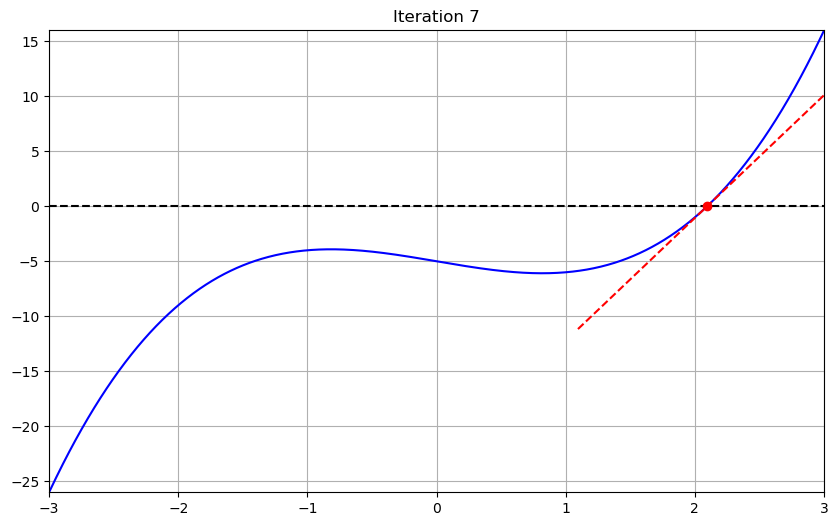

In [ ]:
x = sp.symbols('x')
f1 = x**3 - 2*x - 3
J1 = sp.diff(f1, x)
f1 = sp.lambdify(x, f1)
J1 = sp.lambdify(x, J1)
result1 = newton_raphson(f1, J1, init_guess=-2.0)
print(f"root = {result1.root}, f(root) = {f1(result1.root)}")
print(f"number of iterations = {result1.iterations_count}")
animate_convergence(f1, result1, [-3, 3])

## Example 2
Solve: cos(x) = x

Jacobian is not square. using the psudo inverse
root = [2.09455148], f(root) = [2.35284858e-09]
number of iterations = 4


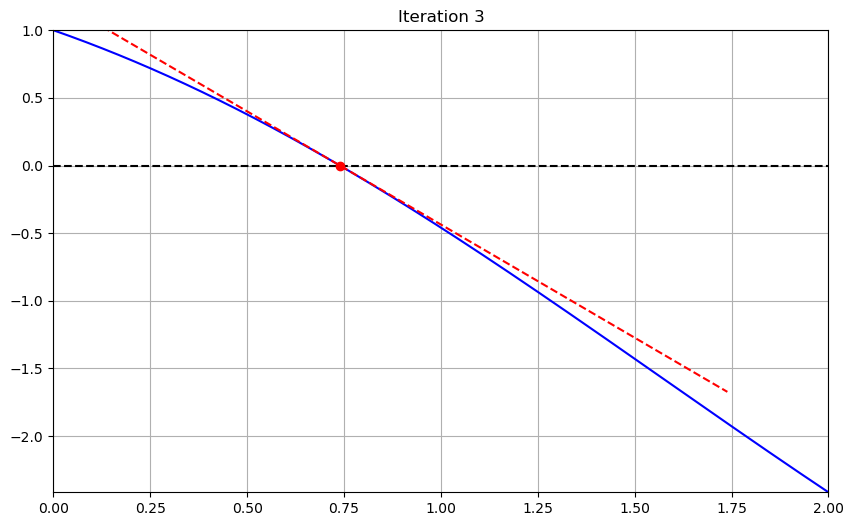

In [4]:
f2 = lambda x: np.cos(x) - x
J2 = lambda x: -np.sin(x) - 1
result2 = newton_raphson(f2, J2, init_guess=1.0)
print(f"root = {result1.root}, f(root) = {f1(result1.root)}")
print(f"number of iterations = {len(result2.iterations)}")
animate_convergence(f2, result2, [0, 2])

## Example 3: Complex Function
Solve: xe^x - 2 = 0

Jacobian is not square. using the psudo inverse
root = [0.85260553], f(root) = [1.05841616e-07]
number of iterations = 4


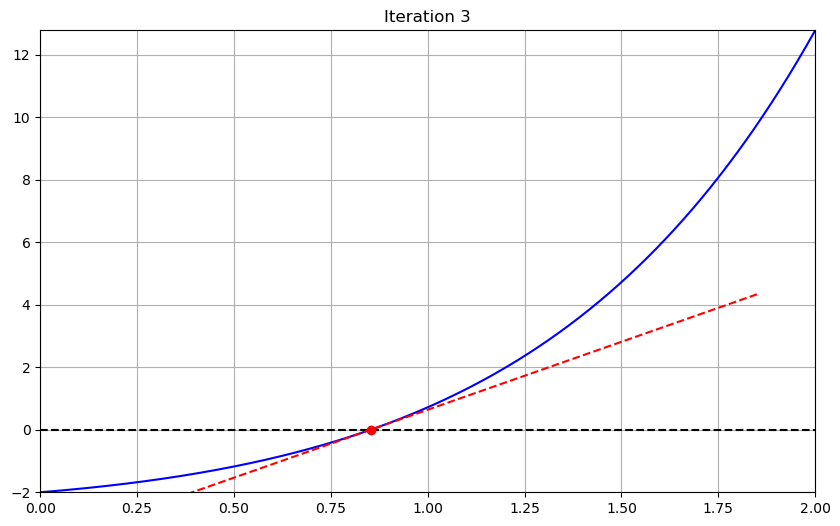

In [13]:
x = sp.symbols('x')
f3 = x*sp.exp(x) - 2
J3 = sp.diff(f3, x)
f3 = sp.lambdify(x, f3)
J3 = sp.lambdify(x, J3)
result3 = newton_raphson(f3, J3, init_guess=1.0)
print(f"root = {result3.root}, f(root) = {f3(result3.root)}")
print(f"number of iterations = {len(result3.iterations)}")
animate_convergence(f3, result3, [0, 2])

## Summary of Results

Let's compare the convergence of all examples:

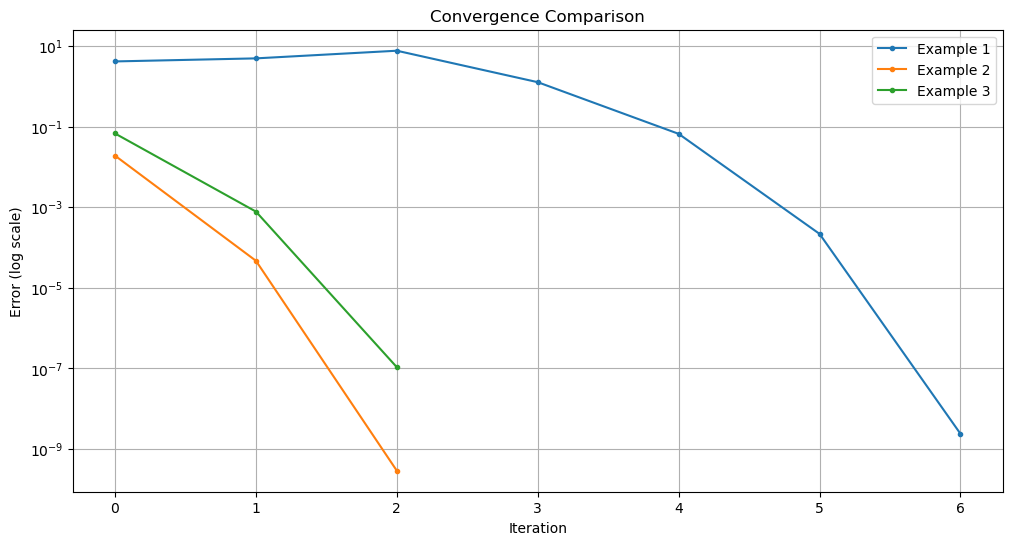

Final Results:
Example 1      : Root = [2.09455148], Iterations = 7
Example 2      : Root = [0.73908513], Iterations = 3
Example 3      : Root = [0.85260553], Iterations = 3


In [17]:
results = {
    'Example 1': result1,
    'Example 2': result2,
    'Example 3': result3,
}

plt.figure(figsize=(12, 6))
for name, result in results.items():
    plt.semilogy(range(len(result.errors)), result.errors, '.-', label=name)

plt.xlabel('Iteration')
plt.ylabel('Error (log scale)')
plt.title('Convergence Comparison')
plt.grid(True)
plt.legend()
plt.show()

# Print final results
print("Final Results:")
for name, result in results.items():
    print(f"{name:15s}: Root = {result.root}, Iterations = {result.iterations_count}")